# Face Detection

> First dectect faces to classify mask or no mask.

## Dependencies

In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

# Import the dependencies.
# OpenCV
import cv2
from mtcnn import MTCNN

# TensorFlow and tf.keras
# https://www.tensorflow.org/api_docs/python/tf/keras
import tensorflow as tf

# Helper libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pathlib import Path

# print version of cv2
print(cv2.__version__)

4.4.0


In [2]:
# Directory of images to test

with_mask = Path("../data/processed/train/with_mask")

## CV2

In [3]:
# OpenCV provides the CascadeClassifier class that can be used to create a cascade classifier for face detection. The constructor can take a filename as an argument that specifies the XML file for a pre-trained model.

# Load the pre-trained model

# Download a pre-trained model for frontal face detection from the OpenCV GitHub project (https://github.com/opencv/opencv/tree/master/data/haarcascades) and place it in your current working directory with the filename ‘haarcascade_frontalface_default.xml‘.
face_clsfr = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# Download a pre-trained model for frontal face detection from the OpenCV GitHub project (https://github.com/opencv/opencv/tree/master/data/haarcascades) and place it in your current working directory with the filename ‘haarcascade_eye.xml‘.
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")

In [4]:
# Accessing our /data/external/test folder we will test the OpenCV classifier

test_path = "../data/external/test/maksssksksss0.png"
test_path_one = "../data/external/test/maksssksksss0.png"
test_path_two = "../data/external/test/maksssksksss273.png"
test_path_three = "../data/external/test/maksssksksss299.png"
test_path_four = "../data/external/test/maksssksksss306.png"

img = cv2.imread(test_path)

In [5]:
# Once loaded, the model can be used to perform face detection on a photograph by calling the detectMultiScale() function.

# Perform face detection
boxed_faces = face_clsfr.detectMultiScale(img)

# Print bounding box for each detected face
for box in boxed_faces:
    # extract
    x, y, width, height = box
    # Printthe box coordinates to double check the numbers
    print(box)
    # drawing a rectangle for each box directly over the pixels of the loaded image using the rectangle()       function that takes two points.
    x2, y2 = x + width, y + height
    # draw a rectangle over the pixels
    cv2.rectangle(img, (x, y), (x2, y2), (0, 0, 255), 1)

# show the image
cv2.imshow("face detection", img)
# keep the window open until we press a key
cv2.waitKey(0)
# close the window
cv2.destroyAllWindows()


[310  82  56  56]
[  9 160  59  59]


## Eye Detection

Using OpenCV

In [6]:
test_path_three = "../data/external/test/maksssksksss273.png"
eye_detect_img = cv2.imread(test_path_three)
gray = cv2.cvtColor(eye_detect_img, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray)
for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(eye_detect_img, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

cv2.imshow("Detect", eye_detect_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


## MTCNN

In [7]:
# I need to fix the reason the model is finding a face wear there is no face!
# This notebook is using cv2 to open, transform, and predict the face detections
# but in the mask detection we will be using Keras only!
mtcnn_img = cv2.imread(test_path_one)
detector = MTCNN()
detector.detect_faces(mtcnn_img)


[{'box': [318, 82, 42, 57],
  'confidence': 0.9532291293144226,
  'keypoints': {'left_eye': (328, 104),
   'right_eye': (348, 102),
   'nose': (338, 116),
   'mouth_left': (331, 127),
   'mouth_right': (349, 124)}},
 {'box': [76, 100, 31, 35],
  'confidence': 0.9441289305686951,
  'keypoints': {'left_eye': (87, 113),
   'right_eye': (102, 114),
   'nose': (95, 120),
   'mouth_left': (89, 127),
   'mouth_right': (100, 128)}}]

In [8]:
mtcnn_img = cv2.imread(test_path_three)
detector = MTCNN()
detector.detect_faces(mtcnn_img)


[{'box': [76, 128, 108, 144],
  'confidence': 0.8285725116729736,
  'keypoints': {'left_eye': (99, 181),
   'right_eye': (148, 177),
   'nose': (120, 207),
   'mouth_left': (108, 243),
   'mouth_right': (145, 240)}}]

In [9]:
mtcnn_img = cv2.imread(test_path_two)
detector = MTCNN()
detector.detect_faces(mtcnn_img)


[{'box': [76, 128, 108, 144],
  'confidence': 0.8285725116729736,
  'keypoints': {'left_eye': (99, 181),
   'right_eye': (148, 177),
   'nose': (120, 207),
   'mouth_left': (108, 243),
   'mouth_right': (145, 240)}}]

In [10]:
mtcnn_img = cv2.imread(test_path_four)
detector = MTCNN()
detector.detect_faces(mtcnn_img)


[{'box': [144, 164, 108, 140],
  'confidence': 0.9771899580955505,
  'keypoints': {'left_eye': (168, 212),
   'right_eye': (217, 216),
   'nose': (183, 243),
   'mouth_left': (167, 276),
   'mouth_right': (203, 280)}}]

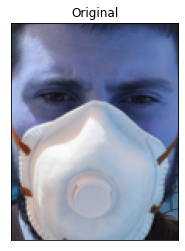

In [11]:
# Testing out the box cropping
def crop_image(im, x, y, w, h):
    return im[y : (y + h), x : (x + w), :]


# Display one image
def display_one(a, title1="Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()


mtcnn_img = cv2.imread(test_path_four)
detector = MTCNN()
box = detector.detect_faces(mtcnn_img)[0]
# box_x, box_y, box_w, box_h = box['box']
display_one(crop_image(mtcnn_img, *box["box"]))


In [12]:
def crop_img(im, x, y, w, h):
    return im[y : (y + h), x : (x + w), :]


def detect_face(face_path):
    img = cv2.cvtColor(cv2.imread(face_path), cv2.COLOR_BGR2RGB)
    box = detector.detect_faces(img)[0]
    return box


def detect_faces(face_path):
    # img = cv2.cvtColor(cv2.imread(face_path), cv2.COLOR_BGR2RGB)
    img = tf.keras.preprocessing.image.load_img(face_path)
    img = tf.keras.preprocessing.image.img_to_array(img)
    box = detector.detect_faces(img)
    return box


def draw_box(face_path="../data/external/test/maksssksksss0.png", plot=True):

    boxes = detect_faces(face_path)
    im = cv2.cvtColor(cv2.imread(face_path), cv2.COLOR_BGR2RGB)

    if plot:
        # Create figure and axes
        num_box = len(boxes)
        fig, ax = plt.subplots(1, (1 + num_box))
        fig.set_size_inches(4 * (1 + num_box), 4)
        # Display the image
        ax[0].imshow(im)
        ax[0].axis("off")
        # Create a Rectangle patch
        for idx, box in enumerate(boxes):
            box_x, box_y, box_w, box_h = box["box"]
            rect = patches.Rectangle(
                (box_x, box_y),
                box_w,
                box_h,
                linewidth=1,
                edgecolor="r",
                facecolor="none",
            )
            ax[0].add_patch(rect)
            ax[0].text(box_x, box_y, "{:3.2f}".format(box["confidence"]))
            for i in box["keypoints"].keys():
                circle = patches.Circle(box["keypoints"][i], radius=5, color="red")
                ax[0].add_patch(circle)
            ax[1 + idx].imshow(crop_img(im, *box["box"]))
            ax[1 + idx].axis("off")
        plt.show()

    res = [crop_img(im, *box["box"]) for box in boxes]

    return res


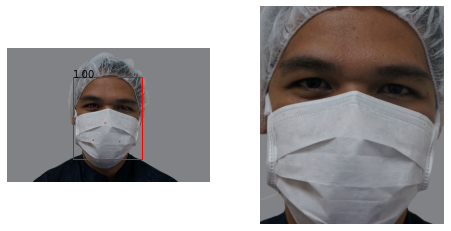

In [13]:
# Test one image
res = draw_box(face_path="../data/processed/train/with_mask/with_mask019.jpg")


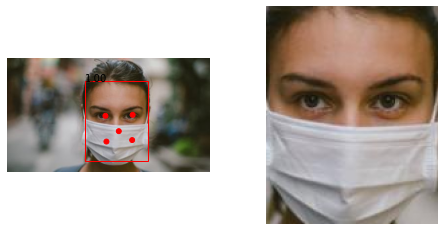

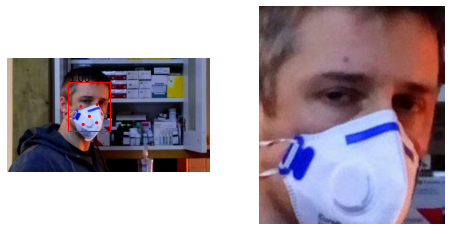

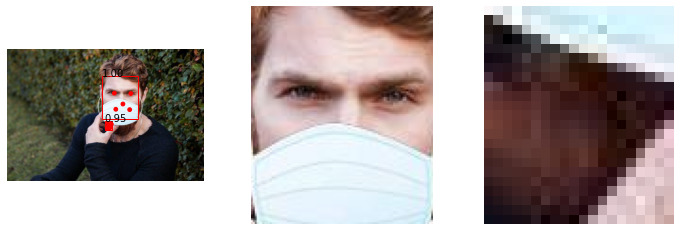

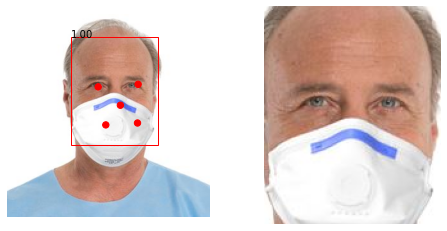

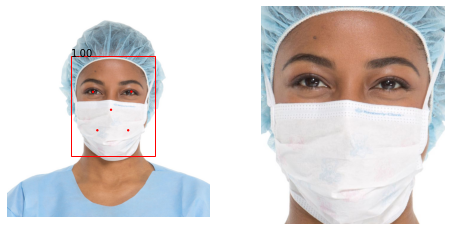

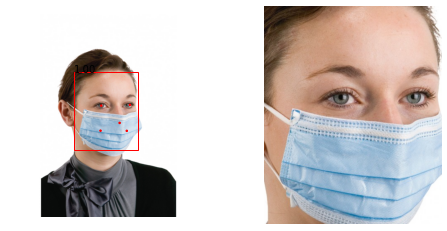

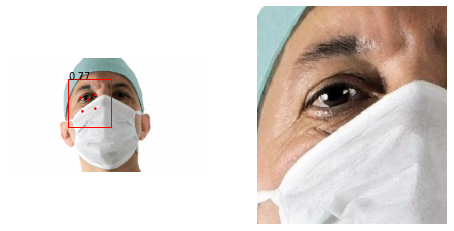

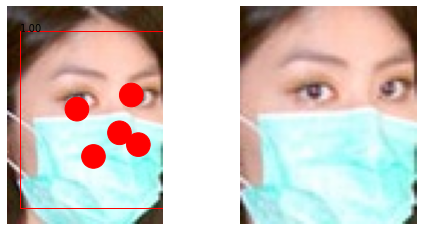

In [14]:
# Test multiple Images
with_mask_str = str(with_mask)
for img in os.listdir(with_mask_str)[:8]:
    draw_box(with_mask_str + "/" + img)
